# XGBoost - Breast Canser (Classification)

[ch9-kaggle-winners.ipynb](https://github.com/kyopark2014/ML-Algorithms/blob/main/xgboost/src/ch9-kaggle-winners.ipynb)

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import time

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
X, y = load_breast_cancer(return_X_y=True)

In [6]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [7]:
pd.DataFrame(X).isna().sum().sum()

0

In [8]:
pd.DataFrame(y).value_counts()

1    357
0    212
dtype: int64

## classification_model

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, StratifiedKFold

kfold = StratifiedKFold(n_splits=5)

def classification_model(model):
    start = time.time()
    
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=kfold)
    # scores = cross_val_score(model, X, y, scoring='recall', cv=kfold)
    
    print('\nElased time: %0.2fs' % (time.time()-start))
    print('Accuracy:', np.round(scores, 2))
    print('Avg. Accuracy: %0.2f' % (scores.mean()))

In [10]:
from xgboost import XGBClassifier

classification_model(XGBClassifier(booster='gbtree'))  # Default

[11:53:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [11]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [12]:
classification_model(XGBClassifier(booster='gblinear'))

[11:53:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [13]:
classification_model(XGBClassifier(booster='dart', one_drop=True))

[11:53:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:53:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [14]:
from sklearn.ensemble import RandomForestClassifier

classification_model(RandomForestClassifier())


Elased time: 0.85s
Accuracy: [0.92 0.96 0.98 0.97 0.97]
Avg. Accuracy: 0.96


## Split train/test datasets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

## HPO

### Default

In [16]:
start = time.time()

xgb = XGBClassifier()

xgb.fit(X_train, y_train)
    
y_pred = xgb.predict(X_test)
    
default_score = accuracy_score(y_pred, y_test)

print('default score: %0.2f' % (default_score))
print('Elased time: %0.2fs' % (time.time()-start))    

params = xgb.get_params()

[11:53:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
default score: 0.95
Elased time: 0.36s


In [17]:
# learning_rate_values
param = 'learning_rate_values'
values = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
best_param = 0
best_score = 0
cnt = 0
start = time.time()
print(param, '=', params.get(param))

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(learning_rate=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1

print('\nElased time: %0.2fs' % (time.time()-start))    
print('best score: %0.2f' % (best_score), 'default_score: %0.2f' % (default_score))
print('advanced score: %0.2f' % (best_score - default_score))
print('best param: ', values[best_param])
learning_rate_values = values[best_param]

learning_rate_values = None
[11:53:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.93
[11:53:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.92
[11:54:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.94
[11:54:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was change

In [18]:
# max_depth
param = 'max_depth'
values = [1, 2, 3, 5, 6, 8]
best_param = 0
best_score = 0
cnt = 0
start = time.time()
print(param, '=', params.get(param))

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(max_depth=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1
    
print('\nElased time: %0.2fs' % (time.time()-start))    
print('best score: %0.2f' % (best_score), 'default_score: %0.2f' % (default_score))
print('advanced score: %0.2f' % (best_score - default_score))
print('best param: ', values[best_param])
max_depth = values[best_param]

max_depth = 6
[11:54:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.95
[11:54:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.95
[11:54:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.96
[11:54:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error'

In [19]:
# gamma
param = 'gamma'
values = [0, 0.01, 0.1, 0.5, 1, 2]
best_param = 0
best_score = 0
cnt = 0
start = time.time()
print(param, '=', params.get(param))

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(gamma=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1
    
print('\nElased time: %0.2fs' % (time.time()-start))    
print('best score: %0.2f' % (best_score), 'default_score: %0.2f' % (default_score))
print('advanced score: %0.2f' % (best_score - default_score))
print('best param: ', values[best_param])
gamma = values[best_param]

gamma = 0
[11:54:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.95
[11:54:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.95
[11:54:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.94
[11:54:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 

In [20]:
# min_child_weight
param = 'min_child_weight'
values = [1, 2, 3, 4, 5]
best_param = 0
best_score = 0
cnt = 0
start = time.time()
print(param, '=', params.get(param))

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(min_child_weight=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1
    
print('\nElased time: %0.2fs' % (time.time()-start))    
print('best score: %0.2f' % (best_score), 'default_score: %0.2f' % (default_score))
print('advanced score: %0.2f' % (best_score - default_score))
print('best param: ', values[best_param])
min_child_weight = values[best_param]

min_child_weight = 1
[11:54:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.95
[11:54:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.94
[11:54:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.94
[11:54:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

In [21]:
# subsample
param = 'subsample'
values = [0.5, 0.7, 0.8, 0.9, 1]
best_param = 0
best_score = 0
cnt = 0
start = time.time()
print(param, '=', params.get(param))

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(subsample=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1
    
print('\nElased time: %0.2fs' % (time.time()-start))    
print('best score: %0.2f' % (best_score), 'default_score: %0.2f' % (default_score))
print('advanced score: %0.2f' % (best_score - default_score))
print('best param: ', values[best_param])
subsample = values[best_param]

subsample = 1
[11:54:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.97
[11:54:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.96
[11:54:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.97
[11:54:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error'

In [22]:
# colsample_bytree
param = 'colsample_bytree'
values = [0.5, 0.7, 0.8, 0.9, 1]
best_param = 0
best_score = 0
cnt = 0
start = time.time()
print(param, '=', params.get(param))

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(colsample_bytree=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1

print('\nElased time: %0.2fs' % (time.time()-start))    
print('best score: %0.2f' % (best_score), 'default_score: %0.2f' % (default_score))
print('advanced score: %0.2f' % (best_score - default_score))
print('best param: ', values[best_param])
colsample_bytree = values[best_param]

colsample_bytree = 1
[11:54:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.96
[11:54:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.95
[11:54:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.96
[11:54:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

In [23]:
# n_estimators
param = 'n_estimators'
values = [50, 100, 200, 400, 800]
best_param = 0
best_score = 0
cnt = 0
start = time.time()
print(param, '=', params.get(param))

for value in values:
    #xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_state=2, verbosity=0, use_label_encoder=False, learning_rate=value)
    xgb = XGBClassifier(n_estimators=value)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    score = accuracy_score(y_pred, y_test)
    
    if score > best_score:
        best_score = score
        best_param = cnt

    print('Accuracy Score: %0.2f' % (score))
    cnt = cnt + 1

print('\nElased time: %0.2fs' % (time.time()-start))    
print('best score: %0.2f' % (best_score), 'default_score: %0.2f' % (default_score))
print('advanced score: %0.2f' % (best_score - default_score))
print('best param: ', values[best_param])
n_estimators = values[best_param]

n_estimators = 100
[11:54:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.94
[11:54:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.95
[11:54:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.95
[11:54:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'e

In [24]:
xgb = XGBClassifier(learning_rate_values=learning_rate_values, max_depth=max_depth, gamma=gamma, min_child_weight=min_child_weight, subsample=subsample, colsample_bytree=colsample_bytree, n_estimators=n_estimators)
    
xgb.fit(X_train, y_train)
    
y_pred = xgb.predict(X_test)
    
score = accuracy_score(y_pred, y_test)

print('Accuracy Score: %0.2f' % (score))
print('advanced score: %0.2f' % (score - default_score))

[11:54:18] WARNING: ../src/learner.cc:576: 
Parameters: { "learning_rate_values" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:54:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.94
advanced score: -0.01


## HPO: Randomized Search

In [25]:
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20): 
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    rand_clf = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=runs, n_jobs=-1, random_state=2, scoring='accuracy')
    
    rand_clf.fit(X_train, y_train)    
    
    best_model = rand_clf.best_estimator_    
    
    best_params = rand_clf.best_params_
    print("best parameter:", best_params)
    
    best_score = rand_clf.best_score_
    print("best recall score: {:.3f}".format(best_score))
    
    return best_model

In [26]:
import time
start = time.time()

best_model = randomized_search(
    params={
        'n_estimators':[50, 100, 200],
        'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
        'max_depth':[1, 2, 3, 5, 6, 8],
        'gamma':[0, 0.01, 0.1, 0.5, 1, 2],
        'min_child_weight':[1, 2, 3, 4, 5],
        'subsample':[0.5, 0.7, 0.8, 0.9, 1],
        'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1],  
        }, 
    runs=20)

print('\nElased time: %0.2fs' % (time.time()-start))

best parameter: {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 3, 'learning_rate': 0.5, 'gamma': 1, 'colsample_bytree': 0.9}
best recall score: 0.977

Elased time: 1088.66s


In [27]:
best_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.9,
 'enable_categorical': False,
 'gamma': 1,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.5,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 2,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 16,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.9,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': 0}

## Evaluation

### cross_val_score

In [28]:
classification_model(best_model)


Elased time: 1.80s
Accuracy: [0.95 0.97 0.99 0.96 0.96]
Avg. Accuracy: 0.97


### Prediction

In [29]:
y_pred = best_model.predict(X_test)

### classification_report

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        56
           1       0.96      0.93      0.95        87

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



In [31]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print('Accuracy Score: %0.2f' % (accuracy_score(y_test,y_pred)))
print('Precision Score: %0.2f' % (precision_score(y_test,y_pred)))
print('Recall Score: %0.2f' % (recall_score(y_test,y_pred)))
print('F1 Score: %0.2f' % (f1_score(y_test,y_pred)))

Accuracy Score: 0.94
Precision Score: 0.96
Recall Score: 0.93
F1 Score: 0.95


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[53,  3],
       [ 6, 81]])

## Feature Importances

In [37]:
model = best_model

In [38]:
print(model.feature_importances_)

[0.         0.02345878 0.         0.         0.00608618 0.
 0.         0.04822837 0.         0.         0.         0.
 0.         0.02075194 0.         0.0069453  0.         0.
 0.00617773 0.         0.01823387 0.01566618 0.5943189  0.05475123
 0.01975029 0.         0.00552536 0.14296854 0.03713732 0.        ]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

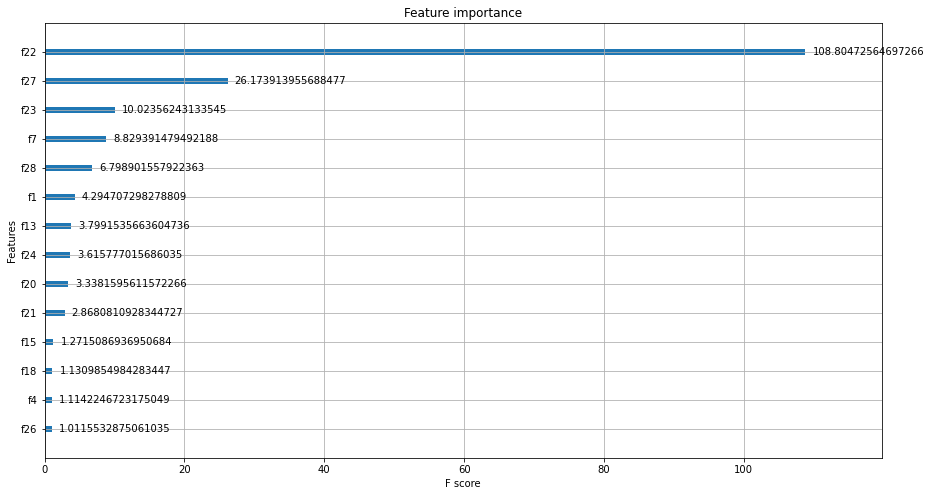

In [39]:
import xgboost as xgb

feature_data = xgb.DMatrix(X_test)
model.get_booster().feature_names = feature_data.feature_names
model.get_booster().feature_types = feature_data.feature_types

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
xgb.plot_importance(model, ax=ax, importance_type='gain')

In [40]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


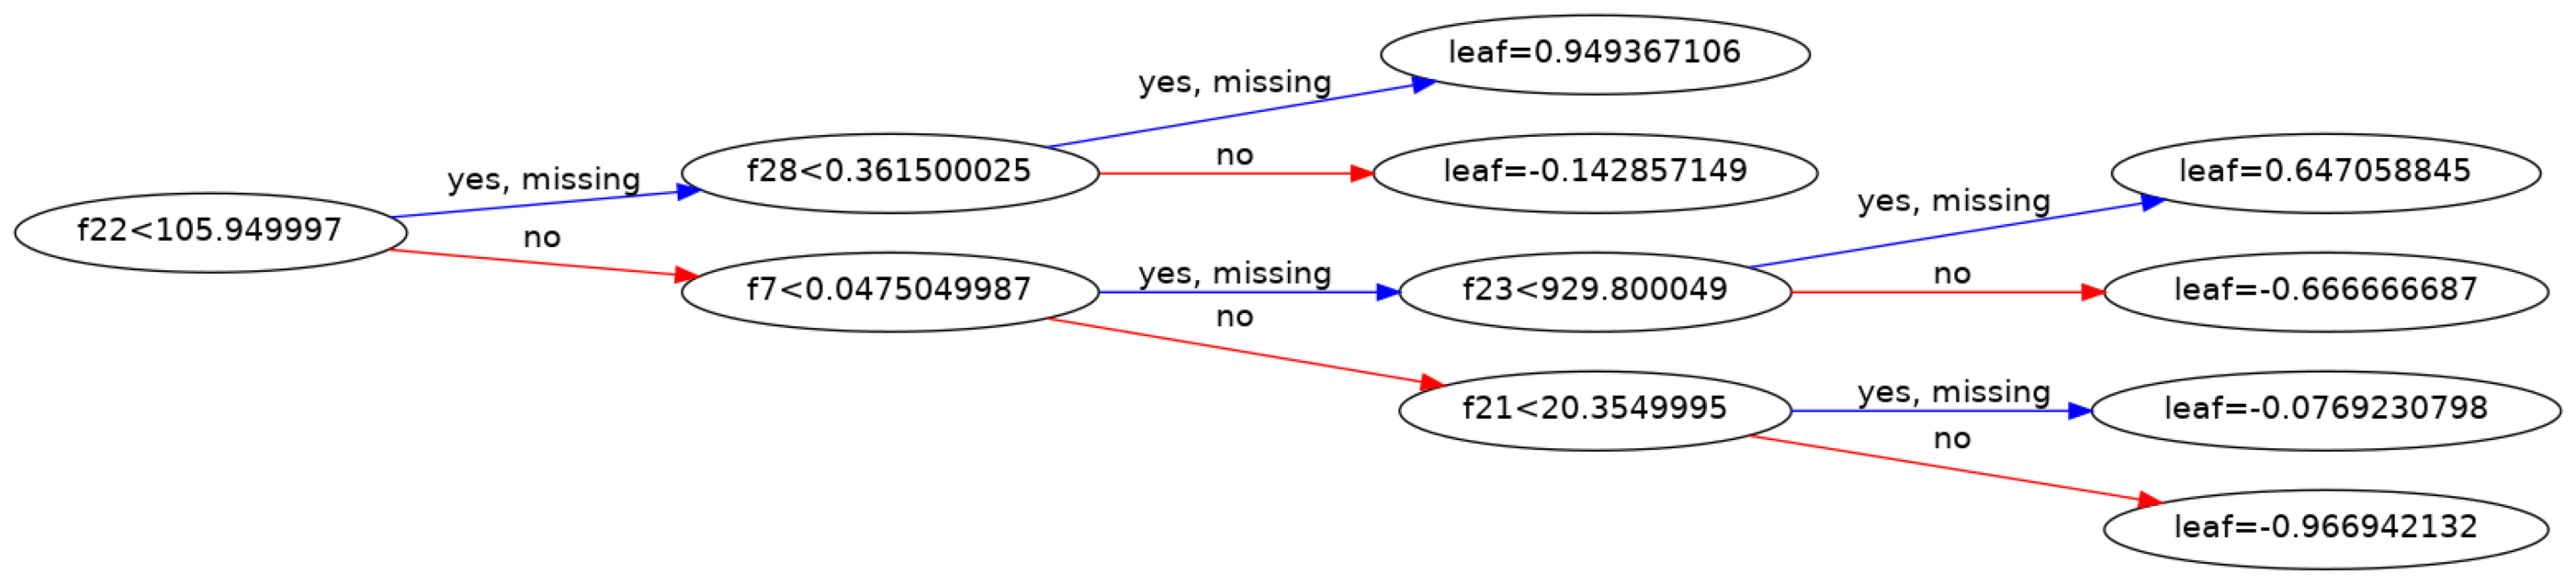

In [41]:
xgb.plot_tree(model, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(50, 15)
plt.show()